In [1]:
# import libraries
import pandas as pd
import shap
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# load data
df = pd.read_csv('../data/CCDC_descriptors.csv', delimiter=';', decimal=',')

In [3]:
# define a function to calculate the shap values for target property
def calculate_shap_values(df, target_property):
    df_property = pd.read_csv('../data/dataset_' + target_property + '.csv')
    
    X_train, X_test, y_train, y_test = train_test_split(df_property, df[target_property], test_size=0.2, random_state=42)
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, subsample=0.8, random_state=42)
    model.fit(X_train, y_train)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    return shap_values, X_test

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


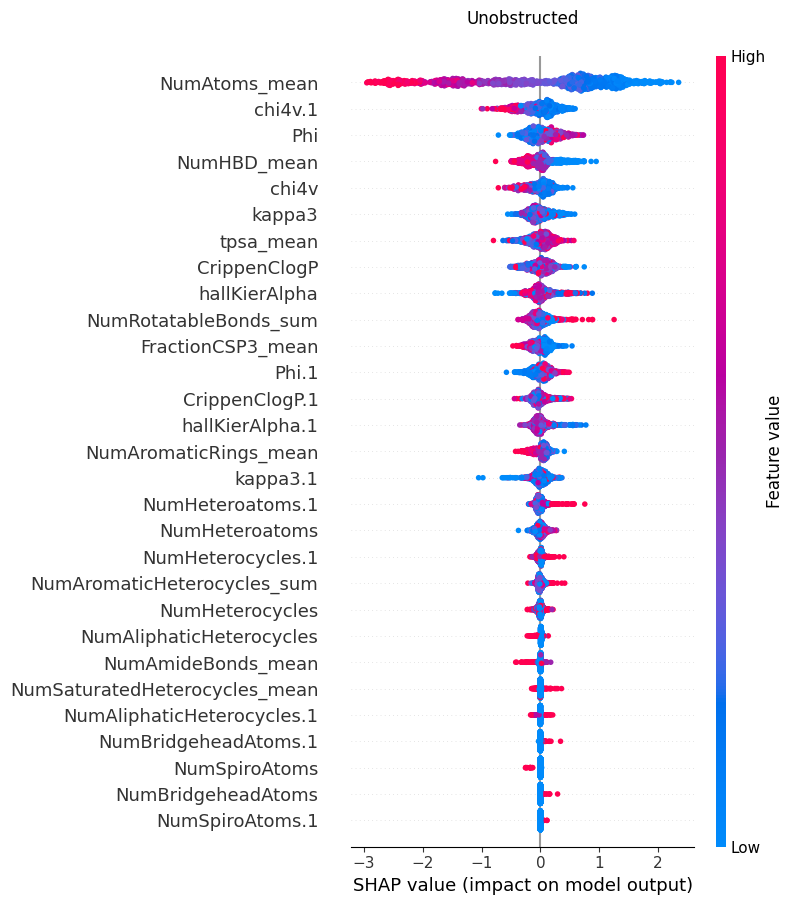

In [4]:
# set the target property
target_property = 'Unobstructed'

# calculate the shap values for target property
shap_values_unobstructed, X_test_unobstructed = calculate_shap_values(df, target_property)

# plot the feature importances
shap.summary_plot(shap_values_unobstructed, X_test_unobstructed, max_display = len(X_test_unobstructed.columns), plot_size = 0.25, show = False)
plt.title(target_property, y = 1.03)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


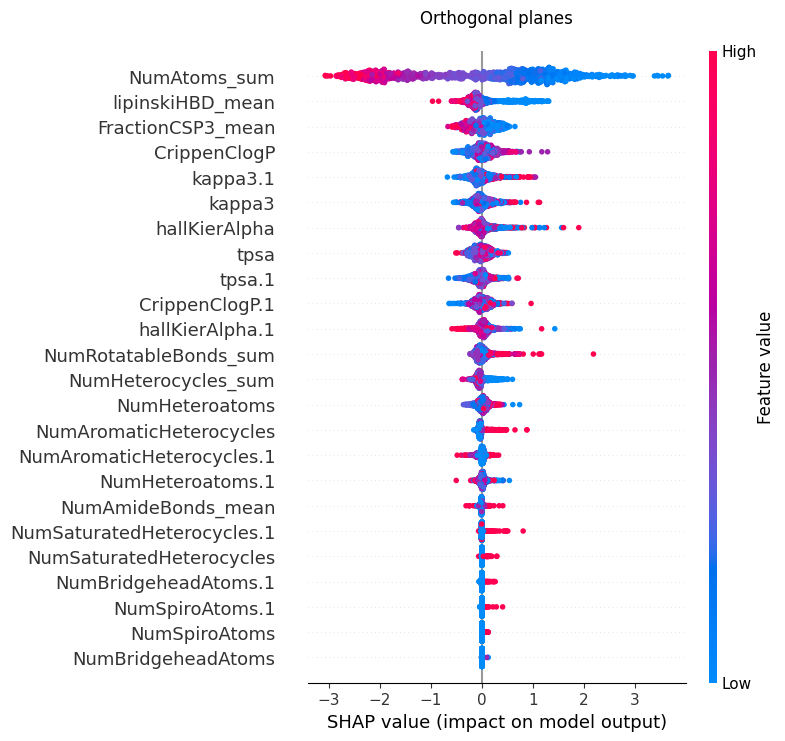

In [5]:
# set the target property
target_property = 'Orthogonal planes'

# calculate the shap values for target property
shap_values_orthogonal_planes, X_test_orthogonal_planes = calculate_shap_values(df, target_property)

# plot the feature importances
plt.title(target_property, y = 1.03)
shap.summary_plot(shap_values_orthogonal_planes, X_test_orthogonal_planes, max_display = len(X_test_orthogonal_planes.columns), plot_size = 0.25, show = False)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


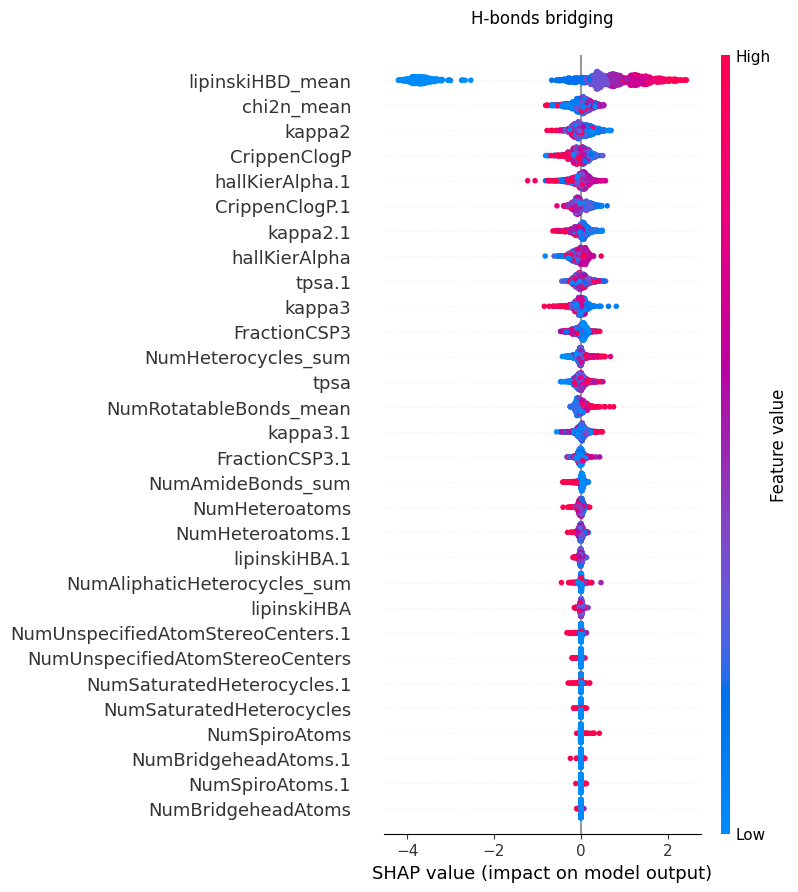

In [6]:
# set the target property
target_property = 'H-bonds bridging'

# calculate the shap values for target property
shap_values_h_bond_bridging, X_test_h_bond_bridging = calculate_shap_values(df, target_property)

# plot the feature importances
plt.title(target_property, y = 1.03)
shap.summary_plot(shap_values_h_bond_bridging, X_test_h_bond_bridging, max_display = len(X_test_h_bond_bridging.columns), plot_size = 0.25, show = False)
plt.show()